**Machine Learning Capstone Project**
Selected projects are **1. Movie Recommnedation System and** and **2. Handwritten Digit Recognition**

**1. Movie Recommendation System**

In [14]:
#Required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast

In [15]:
#Load datasets
movies=pd.read_csv('/home/parallels/Documents/Machine_Learning_Python_Project_IBM_Internship/Datasets/tmdb_5000_movies.csv')
credits=pd.read_csv('/home/parallels/Documents/Machine_Learning_Python_Project_IBM_Internship/Datasets/tmdb_5000_credits.csv')

#Merge the datasets based on title
movies=movies.merge(credits, on='title')

In [16]:
#Preprocessing
#Cleaning
#Keeping only useful cloums
movies=movies[['movie_id','title','overview','genres','cast','crew']]

#Drop rows with missing info
movies.dropna(subset=['overview'], inplace=True)

In [17]:
#Parsing
def convert(obj,limit=None):
  try:
    L=ast.literal_eval(obj)
    if limit is None:
      return [i['name'] for i in L]
    else:
      return [i['name'] for i in L[:limit]]
  except:
    return []

def get_director(obj):
    try:
        L=ast.literal_eval(obj)
        for i in L:
            if i['job']=='Director':
              return [i['name']]
        return []
    except:
        return []

#Apply functions
movies['genres']=movies['genres'].apply(convert)
movies['genres']=movies['genres'].apply(lambda x: [i.lower() for i in x])
movies['cast']=movies['cast'].apply(lambda x: convert(x, 3))
movies['crew']=movies['crew'].apply(get_director)

In [18]:
#Combine columns into one string per movie
movies['soup']=movies['overview'] + ' ' + \
movies['genres'].apply(lambda x: ' '.join(x)) + ' ' + \
movies['cast'].apply(lambda x: ' '.join(x)) + ' ' + \
movies['crew'].apply(lambda x: ' '.join(x))

In [19]:
#Vectorization using tf-idf
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(movies['soup'])

In [20]:
#Cosine similarity matrix
cosine_sim=cosine_similarity(tfidf_matrix,tfidf_matrix)

In [21]:
#Reset the index of the 'movies' dataframe and create pandas series called indices
movies=movies.reset_index(drop=True)
indices=pd.Series(movies.index,index=movies['title']).drop_duplicates()

#Function to recommend similar movies based on title of the movie
def recommend_title(title,num_recommendations=5):
    idx=indices.get(title)

    if idx is None:
        title_lower=title.lower()
        matched=next((t for t in indices.index if t.lower()==title_lower),None)
        if matched:
            idx=indices[matched]
        else:
            return "Movie not found!"

    sim_scores_dense=cosine_sim[idx].toarray().flatten() if hasattr(cosine_sim[idx],'toarray') else cosine_sim[idx]
    sim_scores_list=sim_scores_dense.tolist()

    sim_scores=list(enumerate(sim_scores_list))
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)[1:num_recommendations+1]
    movie_indices=[i[0] for i in sim_scores]

    recommended_movies=movies[['title','genres']].iloc[movie_indices]
    return recommended_movies

#Function to recommend similar movies based on the genre of the movie
def recommend_genre(genre_string, num_recommendations=5):
    genres=[g.strip().lower() for g in genre_string.split(',')]

    genre_movies=movies[movies['genres'].apply(lambda x: all(g in x for g in genres))]

    if genre_movies.empty:
        return "No movies found with all specified genres!"

    genre_indices=genre_movies.index.tolist()

    sim_matrix=cosine_sim[genre_indices]
    avg_sim_scores=sim_matrix.mean(axis=0)

    sim_scores=list(enumerate(avg_sim_scores))
    sim_scores=sorted(sim_scores,key=lambda x: x[1], reverse=True)

    top_indices=[i[0] for i in sim_scores[:num_recommendations]]
    return movies[['title', 'genres']].iloc[top_indices].reset_index(drop=True)

In [22]:
recommend_title(input("Enter a movie title: "))

,title,genres
870,Superman II,"[action, adventure, fantasy, science fiction]"
2435,Superman IV: The Quest for Peace,"[action, adventure, science fiction]"
10,Superman Returns,"[adventure, fantasy, action, science fiction]"
1297,Superman III,"[comedy, action, adventure, fantasy, science f..."
4405,The Helix... Loaded,"[action, comedy, science fiction]"


In [23]:
recommend_genre(input("Enter a genre: "))

,title,genres
0,The Helix... Loaded,"[action, comedy, science fiction]"
1,Mad Max: Fury Road,"[action, adventure, science fiction, thriller]"
2,Last Action Hero,"[adventure, fantasy, action, comedy, family]"
3,X-Men: Days of Future Past,"[action, adventure, fantasy, science fiction]"
4,Man of Steel,"[action, adventure, fantasy, science fiction]"


**2. Handwritten Digit Recognition**

In [24]:
#Required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [25]:
#Load the sklearn dataset
digits=datasets.load_digits()

In [26]:
#Normalise pixel images
X=digits.images/16.0
y=digits.target

#Flatten images for the model
n_samples=len(X)
X=X.reshape((n_samples, -1))

In [27]:
#Split the data into testing and training datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
#Training the random forrest classifier
classifier=RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
#Testing
y_pred=classifier.predict(X_test)

print(classification_report(y_test,y_pred)) #Classification report
print(confusion_matrix(y_test,y_pred)) #confusion matrix

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0

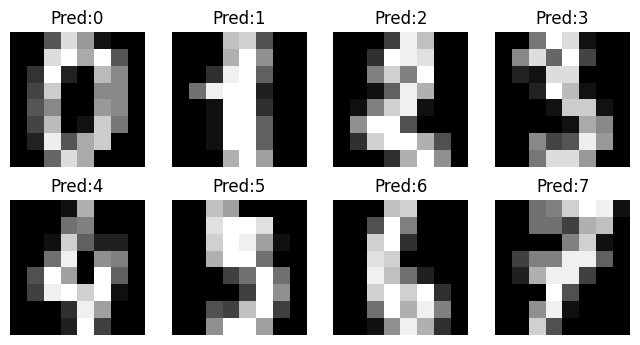

In [30]:
#To display the prediction with comparison to the images
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(8,4))
for i,ax in enumerate(axes.flat):
  ax.imshow(digits.images[i],cmap='gray')
  ax.set_title(f"Pred:{classifier.predict(X[i].reshape(1,-1))[0]}")
  ax.axis('off')

plt.show()